In [44]:
!pip install numpy pandas matplotlib seaborn sklearn scikit prettytable 

ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [48]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [49]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [50]:
# do encode on all numeric value
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')
# Assigning numerical values and storing in another column
df['sex'] = df['sex'].cat.codes
df['smoker'] = df['smoker'].cat.codes
df['region'] = df['region'].cat.codes

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


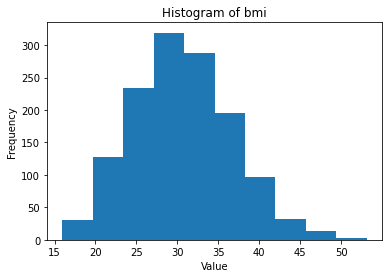

In [51]:
# Create a histogram
plt.hist(df['bmi'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of bmi')
plt.show()

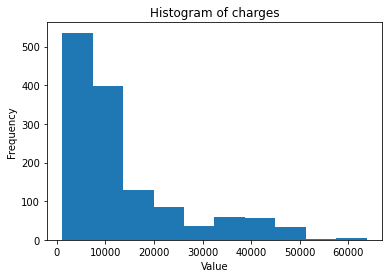

In [52]:
# Create a histogram
plt.hist(df['charges'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of charges')
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['charges_transform'] = scaler.fit_transform(df[['charges']])

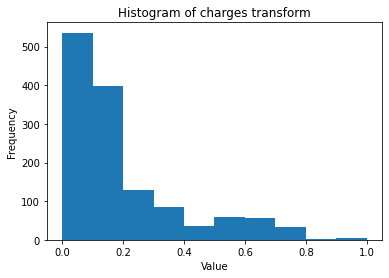

In [54]:
# Create a histogram
plt.hist(df['charges_transform'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of charges transform')
plt.show()

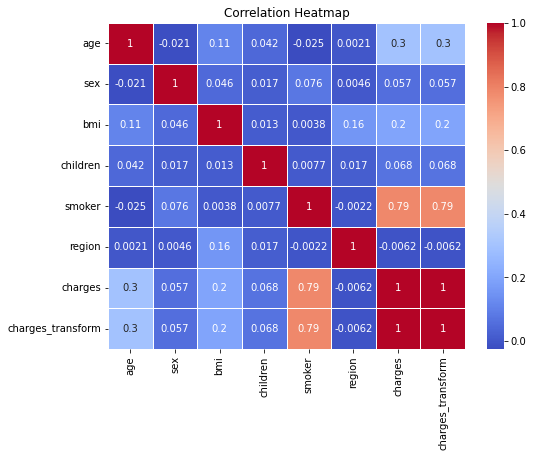

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
correlation_values = df.corr()['charges_transform'].drop('charges_transform')

# Rank the columns by their correlation values
correlation_ranking = correlation_values.abs().sort_values(ascending=False)
correlation_ranking

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges_transform, dtype: float64

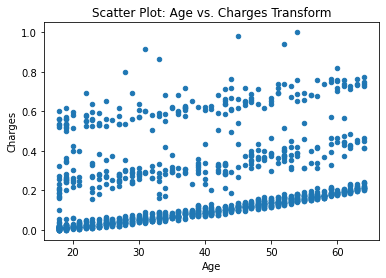

In [57]:
# Create a scatter plot
df.plot.scatter(x='age', y='charges_transform', title='Scatter Plot: Age vs. Charges Transform')

# Show the plot
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

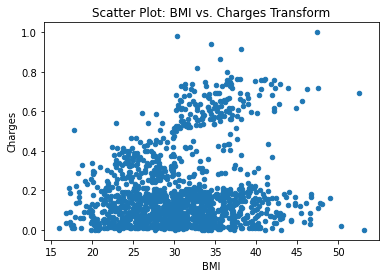

In [58]:
# Create a scatter plot
df.plot.scatter(x='bmi', y='charges_transform', title='Scatter Plot: BMI vs. Charges Transform')

# Show the plot
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

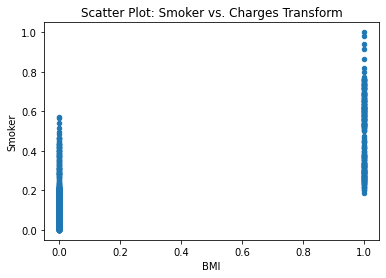

In [59]:
# Create a scatter plot
df.plot.scatter(x='smoker', y='charges_transform', title='Scatter Plot: Smoker vs. Charges Transform')


# Show the plot
plt.xlabel('BMI')
plt.ylabel('Smoker')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

X = df[['age', 'smoker']]
y = df['charges_transform']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
!pip install prettytable

In [65]:
from prettytable import PrettyTable
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

results_table = PrettyTable()
results_table.field_names = ["Metric", "Value"]
results_table.add_row(["R-squared", round(r_squared, 2)])
results_table.add_row(["MSE", round(mse, 2)])
results_table.add_row(["MAE", round(mae, 2)])

results_table

Metric,Value
R-squared,0.75
MSE,0.01
MAE,0.06


In [68]:
def get_original_charge(scaled_value):
    original_max = df['charges'].max()
    original_min = df['charges'].min()
    return (scaled_value * (original_max - original_min)) + original_min

In [75]:
print(f"{get_original_charge(0), df['charges'].min()}")
print(f"{get_original_charge(1), df['charges'].max()}")

(1121.8739, 1121.8739)
(63770.42801, 63770.42801)


In [76]:
def predict_charge(smoker, age):
    # Predict the charge based on age and smoker status
    predicted_charge = model.predict([[age, smoker]])
    return predicted_charge[0]

In [80]:
result = predict_charge(0, 33)
get_original_charge(result)

6720.941777351023